In [24]:
import requests
import pandas as pd

In [2]:
requests.get('https://api.github.com')

<Response [200]>

In [3]:
response = requests.get('https://api.github.com')

In [4]:
response.content

b'{"current_user_url":"https://api.github.com/user","current_user_authorizations_html_url":"https://github.com/settings/connections/applications{/client_id}","authorizations_url":"https://api.github.com/authorizations","code_search_url":"https://api.github.com/search/code?q={query}{&page,per_page,sort,order}","commit_search_url":"https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}","emails_url":"https://api.github.com/user/emails","emojis_url":"https://api.github.com/emojis","events_url":"https://api.github.com/events","feeds_url":"https://api.github.com/feeds","followers_url":"https://api.github.com/user/followers","following_url":"https://api.github.com/user/following{/target}","gists_url":"https://api.github.com/gists{/gist_id}","hub_url":"https://api.github.com/hub","issue_search_url":"https://api.github.com/search/issues?q={query}{&page,per_page,sort,order}","issues_url":"https://api.github.com/issues","keys_url":"https://api.github.com/user/keys","label_sea

In [5]:
response.encoding = 'utf-8' 
response.text

'{"current_user_url":"https://api.github.com/user","current_user_authorizations_html_url":"https://github.com/settings/connections/applications{/client_id}","authorizations_url":"https://api.github.com/authorizations","code_search_url":"https://api.github.com/search/code?q={query}{&page,per_page,sort,order}","commit_search_url":"https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}","emails_url":"https://api.github.com/user/emails","emojis_url":"https://api.github.com/emojis","events_url":"https://api.github.com/events","feeds_url":"https://api.github.com/feeds","followers_url":"https://api.github.com/user/followers","following_url":"https://api.github.com/user/following{/target}","gists_url":"https://api.github.com/gists{/gist_id}","hub_url":"https://api.github.com/hub","issue_search_url":"https://api.github.com/search/issues?q={query}{&page,per_page,sort,order}","issues_url":"https://api.github.com/issues","keys_url":"https://api.github.com/user/keys","label_sear

In [6]:
response.headers

{'Date': 'Wed, 18 Dec 2024 10:19:59 GMT', 'Cache-Control': 'public, max-age=60, s-maxage=60', 'Vary': 'Accept,Accept-Encoding, Accept, X-Requested-With', 'ETag': '"4f825cc84e1c733059d46e76e6df9db557ae5254f9625dfe8e1b09499c449438"', 'x-github-api-version-selected': '2022-11-28', 'Access-Control-Expose-Headers': 'ETag, Link, Location, Retry-After, X-GitHub-OTP, X-RateLimit-Limit, X-RateLimit-Remaining, X-RateLimit-Used, X-RateLimit-Resource, X-RateLimit-Reset, X-OAuth-Scopes, X-Accepted-OAuth-Scopes, X-Poll-Interval, X-GitHub-Media-Type, X-GitHub-SSO, X-GitHub-Request-Id, Deprecation, Sunset', 'Access-Control-Allow-Origin': '*', 'Strict-Transport-Security': 'max-age=31536000; includeSubdomains; preload', 'X-Frame-Options': 'deny', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '0', 'Referrer-Policy': 'origin-when-cross-origin, strict-origin-when-cross-origin', 'Content-Security-Policy': "default-src 'none'", 'Server': 'github.com', 'Content-Type': 'application/json; charset=utf

In [ ]:
response.headers['Content-Type'] #тип содержимого

'application/json; charset=utf-8'

In [4]:
response = requests.get(
    'https://api.github.com/search/repositories',
    params={'q': 'requests+language:python'}, #или так [('q', 'requests+language:python')]
)
json_response = response.json()
# исследуем атрибут 'items' в ответе
repository = json_response['items'][0]
print(f'Repository name: {repository["name"]}')

Repository name: secrules-language-evaluation


In [ ]:
requests.post('https://httpbin.org/post', data={'key':'value'}) #отправляем данные key:value
requests.put('https://httpbin.org/put', data={'key':'value'})# отправляем данные key:value
requests.delete('https://httpbin.org/delete')# если хотим удалить ресурс по ссылке (не объект, а ресурс - например, страницу)
requests.head('https://httpbin.org/get')#отправляем запрос, но не получим тело ответа
requests.patch('https://httpbin.org/patch', data={'key':'value'}) # обновляем значение value по ключу key

<Response [200]>

In [6]:
response = requests.head('https://httpbin.org/get')
response.headers['Content-Type']

'application/json'

In [7]:
response = requests.delete('https://httpbin.org/delete')
json_response = response.json()
json_response['args']

{}

In [8]:
response = requests.post('https://httpbin.org/post', json={'key':'value'})
json_response = response.json()
json_response['data']

'{"key": "value"}'

### Парсинг страниц с помощью requests и beautifulsoup4. Практика

In [3]:
url = 'https://assets.digitalocean.com/articles/eng_python/beautiful-soup/mockturtle.html'
page = requests.get(url)

In [4]:
page.status_code

200

In [5]:
page.text

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"\n    "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">\n\n<html lang="en-US" xmlns="http://www.w3.org/1999/xhtml" xml:lang="en-US">\n<head>\n  <meta http-equiv="content-type" content="text/html; charset=us-ascii" />\n\n  <title>Turtle Soup</title>\n</head>\n\n<body>\n  <h1>Turtle Soup</h1>\n\n  <p class="verse" id="first">Beautiful Soup, so rich and green,<br />\n  Waiting in a hot tureen!<br />\n  Who for such dainties would not stoop?<br />\n  Soup of the evening, beautiful Soup!<br />\n  Soup of the evening, beautiful Soup!<br /></p>\n\n  <p class="chorus" id="second">Beau--ootiful Soo--oop!<br />\n  Beau--ootiful Soo--oop!<br />\n  Soo--oop of the e--e--evening,<br />\n  Beautiful, beautiful Soup!<br /></p>\n\n  <p class="verse" id="third">Beautiful Soup! Who cares for fish,<br />\n  Game or any other dish?<br />\n  Who would not give all else for two<br />\n  Pennyworth only of Beautiful Soup?<br />\n  Pennyworth only of

In [8]:
from bs4 import BeautifulSoup

In [9]:
soup = BeautifulSoup(page.text,'html.parser')

In [10]:
print(soup.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
    "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html lang="en-US" xml:lang="en-US" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <title>
   Turtle Soup
  </title>
 </head>
 <body>
  <h1>
   Turtle Soup
  </h1>
  <p class="verse" id="first">
   Beautiful Soup, so rich and green,
   <br/>
   Waiting in a hot tureen!
   <br/>
   Who for such dainties would not stoop?
   <br/>
   Soup of the evening, beautiful Soup!
   <br/>
   Soup of the evening, beautiful Soup!
   <br/>
  </p>
  <p class="chorus" id="second">
   Beau--ootiful Soo--oop!
   <br/>
   Beau--ootiful Soo--oop!
   <br/>
   Soo--oop of the e--e--evening,
   <br/>
   Beautiful, beautiful Soup!
   <br/>
  </p>
  <p class="verse" id="third">
   Beautiful Soup! Who cares for fish,
   <br/>
   Game or any other dish?
   <br/>
   Who would not give all else for two
   <br/>
   Pennyworth only of 

In [11]:
soup.find_all('p')

[<p class="verse" id="first">Beautiful Soup, so rich and green,<br/>
   Waiting in a hot tureen!<br/>
   Who for such dainties would not stoop?<br/>
   Soup of the evening, beautiful Soup!<br/>
   Soup of the evening, beautiful Soup!<br/></p>,
 <p class="chorus" id="second">Beau--ootiful Soo--oop!<br/>
   Beau--ootiful Soo--oop!<br/>
   Soo--oop of the e--e--evening,<br/>
   Beautiful, beautiful Soup!<br/></p>,
 <p class="verse" id="third">Beautiful Soup! Who cares for fish,<br/>
   Game or any other dish?<br/>
   Who would not give all else for two<br/>
   Pennyworth only of Beautiful Soup?<br/>
   Pennyworth only of beautiful Soup?<br/></p>,
 <p class="chorus" id="fourth">Beau--ootiful Soo--oop!<br/>
   Beau--ootiful Soo--oop!<br/>
   Soo--oop of the e--e--evening,<br/>
   Beautiful, beauti--FUL SOUP!<br/></p>]

In [12]:
soup.find_all('p')[2].get_text()

'Beautiful Soup! Who cares for fish,\n  Game or any other dish?\n  Who would not give all else for two\n  Pennyworth only of Beautiful Soup?\n  Pennyworth only of beautiful Soup?'

In [13]:
soup.find_all(class_='chorus')

[<p class="chorus" id="second">Beau--ootiful Soo--oop!<br/>
   Beau--ootiful Soo--oop!<br/>
   Soo--oop of the e--e--evening,<br/>
   Beautiful, beautiful Soup!<br/></p>,
 <p class="chorus" id="fourth">Beau--ootiful Soo--oop!<br/>
   Beau--ootiful Soo--oop!<br/>
   Soo--oop of the e--e--evening,<br/>
   Beautiful, beauti--FUL SOUP!<br/></p>]

In [14]:
soup.find_all('p', class_='chorus')

[<p class="chorus" id="second">Beau--ootiful Soo--oop!<br/>
   Beau--ootiful Soo--oop!<br/>
   Soo--oop of the e--e--evening,<br/>
   Beautiful, beautiful Soup!<br/></p>,
 <p class="chorus" id="fourth">Beau--ootiful Soo--oop!<br/>
   Beau--ootiful Soo--oop!<br/>
   Soo--oop of the e--e--evening,<br/>
   Beautiful, beauti--FUL SOUP!<br/></p>]

In [15]:
soup.find_all(id='third')

[<p class="verse" id="third">Beautiful Soup! Who cares for fish,<br/>
   Game or any other dish?<br/>
   Who would not give all else for two<br/>
   Pennyworth only of Beautiful Soup?<br/>
   Pennyworth only of beautiful Soup?<br/></p>]

### Подмена User-Agent и скачивание страниц через прокси

In [16]:
#full url = "https://en.soccerwiki.org/league.php?leagueid=78"
base_url = "https://en.soccerwiki.org/"
add_url = "league.php?leagueid=78"

response = requests.get(base_url + add_url).text
soup = BeautifulSoup(response, 'html.parser')

In [17]:
div = soup.find_all('div', class_='table-custom-responsive mb-3')[0]
table = div.find('table',attrs = {'class':'table-custom table-roster'})
rows = table.select('td.text-left:nth-child(2)')
rows

[<td class="text-left text-dark font-weight-normal">Club</td>,
 <td class="text-left"><a href="/squad.php?clubid=1248">Akhmat Grozny</a></td>,
 <td class="text-left"><a href="/squad.php?clubid=5533">Akron Tolyatti</a></td>,
 <td class="text-left"><a href="/squad.php?clubid=254">CSKA Moskva</a></td>,
 <td class="text-left"><a href="/squad.php?clubid=5945">Dynamo Makhachkala</a></td>,
 <td class="text-left"><a href="/squad.php?clubid=255">Dynamo Moskva</a></td>,
 <td class="text-left"><a href="/squad.php?clubid=3109">Fakel Voronezh</a></td>,
 <td class="text-left"><a href="/squad.php?clubid=1673">FC Krasnodar</a></td>,
 <td class="text-left"><a href="/squad.php?clubid=2619">FC Orenburg</a></td>,
 <td class="text-left"><a href="/squad.php?clubid=259">FC Rostov</a></td>,
 <td class="text-left"><a href="/squad.php?clubid=725">Khimki</a></td>,
 <td class="text-left"><a href="/squad.php?clubid=257">Krylia Sovetov Samara</a></td>,
 <td class="text-left"><a href="/squad.php?clubid=258">Lokomoti

In [18]:
clubs = []
for td in rows:
    try:
        clubs.append(td.find('a').attrs['href'])
    except Exception as e: 
        print(e)
clubs

'NoneType' object has no attribute 'attrs'


['/squad.php?clubid=1248',
 '/squad.php?clubid=5533',
 '/squad.php?clubid=254',
 '/squad.php?clubid=5945',
 '/squad.php?clubid=255',
 '/squad.php?clubid=3109',
 '/squad.php?clubid=1673',
 '/squad.php?clubid=2619',
 '/squad.php?clubid=259',
 '/squad.php?clubid=725',
 '/squad.php?clubid=257',
 '/squad.php?clubid=258',
 '/squad.php?clubid=1663',
 '/squad.php?clubid=260',
 '/squad.php?clubid=263',
 '/squad.php?clubid=265']

In [19]:
%%time 
ratings = []
for club in clubs:
    html_club = requests.get(base_url + club).text
    soup_club = BeautifulSoup(html_club, 'html.parser')
    table = soup_club.find('table',attrs = {'id':'datatable'})
    td_ratings = table.select('td:nth-child(7)')
    for rating in td_ratings:
        ratings.append(int(rating.get_text()))

CPU times: total: 1.55 s
Wall time: 14.1 s


C:\Users\anzel\AppData\Local\Temp\ipykernel_9776\1433426036.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pd.Series(ratings))


<Axes: ylabel='Density'>

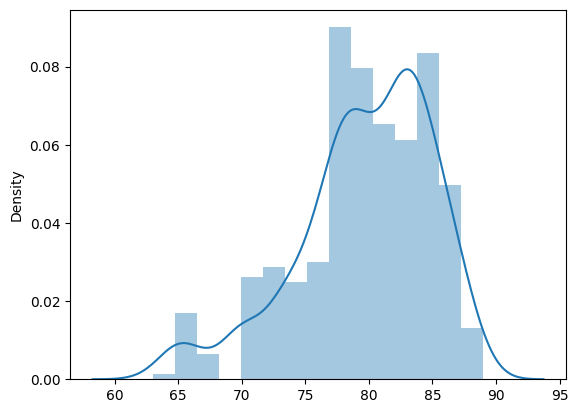

In [25]:
import seaborn as sns

sns.distplot(pd.Series(ratings))

In [35]:
%%time 
age = []
for club in clubs:
    html_club = requests.get(base_url + club).text
    soup_club = BeautifulSoup(html_club, 'html.parser')
    table = soup_club.find('table',attrs = {'id':'datatable'})
    td_ratings = table.select('td:nth-child(6)')
    for rating in td_ratings:
        age.append(int(rating.get_text()))

CPU times: total: 1.53 s
Wall time: 6.89 s


In [36]:
import statistics
avg = statistics.mean(age)
avg

25.452488687782804

### Selenium. Парсинг страниц с эмуляцией поведения человека

In [37]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

In [46]:
# Задаём путь до файла с драйвером для браузера
executable_path = './msedgedriver.exe'

# Создаём веб-драйвер для работы
driver = webdriver.Edge(
    service=ChromeService(executable_path=executable_path)
)


In [47]:
# Сайт, с которым мы будем работать - документация по Python
url = "http://www.python.org"

# Переходим на сайт
driver.get(url)

In [41]:
print(driver.title)

Welcome to Python.org


In [48]:
elem = driver.find_element(by=By.NAME , value='q')

In [49]:
elem.send_keys("pycon")
elem.send_keys(Keys.RETURN)

In [44]:
driver.close()

In [ ]:
id = #идентификатор нужной нам кнопки
# Находим кнопку, например по её id
button = driver.find_element(by.ID, id)
# Кликаем на кнопку
button.click()

In [ ]:
# Выпадающие списки и селекторы

element = driver.find_element(By.XPATH, "//select[@name='name']")
all_options = element.find_elements(By.TAG_NAME, "option")
for option in all_options:
    print("Value is: %s" % option.get_attribute("value"))
    option.click()

In [ ]:
# Ввод текста

element = driver.find_element(By.NAME, "passwd")
element.send_keys("my password")

In [ ]:
# перемещение по страницам

driver.get("http://www.example.com")
driver.forward()
driver.back()